In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from ppxf_functions_Z import (
    load_spectrum,
    process_spectrum,
    rebin_to_log,
    make_noise,
    calculate_velscale_fwhm,
    run_ppxf,
    plot_ppxf,
)

In [2]:
raw = np.load("../SB3_data.npy")       # 2D array (flux × spatial pixel)
waveem = np.load("../SB3_waveobs.npy")

window_size = 10
step        = 1
scale       = 0.4   # arcsec per pixel

pix_min, pix_max = 150, 250   
results = []
raw_roi = raw[:, pix_min:pix_max]

for start in range(0, raw_roi.shape[1] - window_size + 1, step):
    end = start + window_size
    spectrum = raw_roi[:, start:end].sum(axis=1)

    # Build DataFrame for this spectrum
    df_spec = pd.DataFrame({
        "waveem": waveem,
        "flux":   spectrum
    })

    # Process, rebin, and run pPXF
    df_cut = process_spectrum(df_spec)
    df_rb, lam, flux_rb, ln_w = rebin_to_log(df_cut)

    noise = make_noise(df_rb)
    velscale, fwhm = calculate_velscale_fwhm(ln_w, lam)
    center = start + window_size//2 + pix_min


    # run improved pPXF (set redshift if spectrum not corrected)
    pp = run_ppxf(lam, fwhm, velscale, df_rb, noise, redshift=0.041185744)

    # Compute global center index
    center = start + window_size//2 + pix_min
    print(f'PIXEL: {center}')

    # Store center, rebinned DataFrame, and fit result
    results.append((center, df_rb, pp))


Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:     11998       257
 comp.  1:     12296       227
chi2/DOF: 0.8083; DOF: 1588; degree = -1; mdegree = 10
method = capfit; Jac calls: 5; Func calls: 77; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      9.139       2.3   12296   227
Comp:  1           [NII]6583_d      6.124       2.9   12296   227
-----------------------------------------------------------------
PIXEL: 155
Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' 'He

Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:     12029       379
 comp.  1:     12101       318
chi2/DOF: 0.9074; DOF: 1588; degree = -1; mdegree = 10
method = capfit; Jac calls: 6; Func calls: 94; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      13.25       2.5   12101   318
Comp:  1           [NII]6583_d      8.366       3.1   12101   318
-----------------------------------------------------------------
PIXEL: 165
Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' 'He

Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:     11987       440
 comp.  1:     11946       251
chi2/DOF: 0.3090; DOF: 1588; degree = -1; mdegree = 10
method = capfit; Jac calls: 7; Func calls: 107; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      18.38       1.2   11946   251
Comp:  1           [NII]6583_d      9.083       1.5   11946   251
-----------------------------------------------------------------
PIXEL: 175
Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' 'H

Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:     11421      1000
 comp.  1:     12118       228
chi2/DOF: 0.1735; DOF: 1588; degree = -1; mdegree = 10
method = capfit; Jac calls: 11; Func calls: 167; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 4/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      4.656      0.98   12118   228
Comp:  1           [NII]6583_d      3.536       1.2   12118   228
-----------------------------------------------------------------
PIXEL: 185
Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' '

Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:     11703      1000
 comp.  1:     12231       169
chi2/DOF: 0.03849; DOF: 1588; degree = -1; mdegree = 10
method = capfit; Jac calls: 16; Func calls: 243; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      9.422       1.3   12231   169
Comp:  1           [NII]6583_d      7.886       1.6   12231   169
-----------------------------------------------------------------
PIXEL: 195
Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' 

Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:     10100      1000
 comp.  1:     12149       249
chi2/DOF: 0.09191; DOF: 1588; degree = -1; mdegree = 10
method = capfit; Jac calls: 10; Func calls: 152; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 4/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      2.121       1.4   12149   249
Comp:  1           [NII]6583_d      4.270       1.8   12149   249
-----------------------------------------------------------------
PIXEL: 205
Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' 

Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:     12367       423
 comp.  1:     12081       322
chi2/DOF: 0.4740; DOF: 1588; degree = -1; mdegree = 10
method = capfit; Jac calls: 7; Func calls: 110; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      15.88       2.0   12081   322
Comp:  1           [NII]6583_d      9.428       2.5   12081   322
-----------------------------------------------------------------
PIXEL: 215
Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' 'H

Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:     10100      1000
 comp.  1:     12276       130
chi2/DOF: 0.6552; DOF: 1588; degree = -1; mdegree = 10
method = capfit; Jac calls: 10; Func calls: 154; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 4/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      11.53       1.2   12276   130
Comp:  1           [NII]6583_d      6.287       1.5   12276   130
-----------------------------------------------------------------
PIXEL: 225
Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' '

Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:     11407      1000
 comp.  1:     12019       238
chi2/DOF: 0.4173; DOF: 1588; degree = -1; mdegree = 10
method = capfit; Jac calls: 8; Func calls: 123; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 3/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      25.55       1.9   12019   238
Comp:  1           [NII]6583_d      14.53       2.5   12019   238
-----------------------------------------------------------------
PIXEL: 235
Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' 'H

Emission lines included in gas templates:
['H8' 'Heps' 'Hdelta' 'Hgamma' 'Hbeta' 'Halpha' '[SII]6716' '[NeIII]3968'
 '[NeIII]3869' 'HeII4687' 'HeI5876' '[OIII]5007_d' '[OI]6300_d'
 '[NII]6583_d']
 Best Fit:       Vel     sigma
 comp.  0:     12267       146
 comp.  1:     12411         1
chi2/DOF: 0.8663; DOF: 1588; degree = -1; mdegree = 10
method = capfit; Jac calls: 6; Func calls: 92; Status: 2
linear_method = lsq_box; Nonzero Templates (>0.1%): 2/152
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
gas_component           name        flux       err      V     sig
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Comp:  1                Halpha      0.000       2.6   12411     1
Comp:  1           [NII]6583_d      4.532       3.2   12411     1
-----------------------------------------------------------------
PIXEL: 245


Peak flux at 194 px


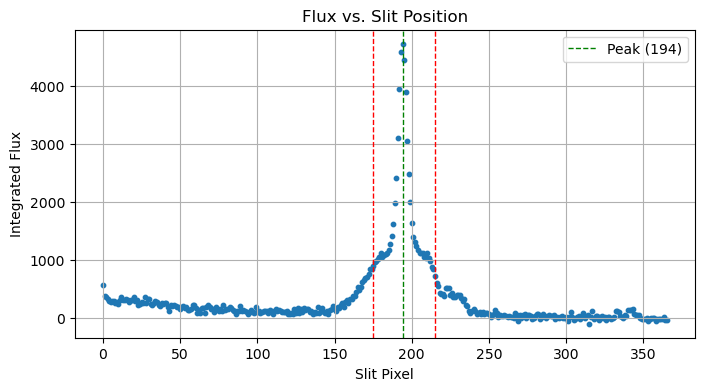

In [3]:
# raw.shape == (n_wave, n_spatial)
spatial_flux = raw.sum(axis=0)       # total flux in each slit column
slit_pixels  = np.arange(raw.shape[1])

# Only look between 150 and 250
search_range = slice(150, 251)
peak_rel = np.argmax(spatial_flux[search_range])
peak = slit_pixels[search_range][peak_rel]

print(f"Peak flux at {peak} px")

plt.figure(figsize=(8, 4))
plt.axvline(peak, color='green', linestyle='--', linewidth=1,
            label=f'Peak ({peak})')
plt.axvline(175, color='red', linestyle='--', linewidth=1)
plt.axvline(215, color='red', linestyle='--', linewidth=1)
plt.scatter(slit_pixels, spatial_flux, s=10)
plt.xlabel("Slit Pixel")
plt.ylabel("Integrated Flux")
plt.title("Flux vs. Slit Position")
plt.grid(True)
plt.legend()
plt.show()


Window centre: 180


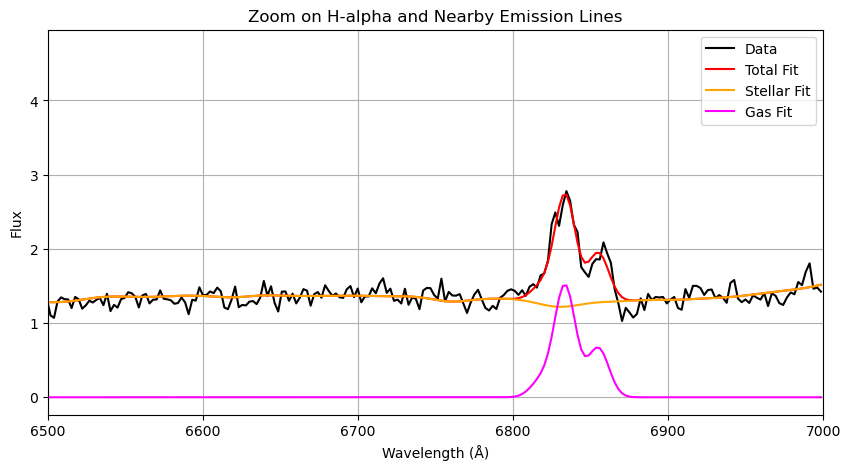

σ (km/s): 274.12

Window centre: 181


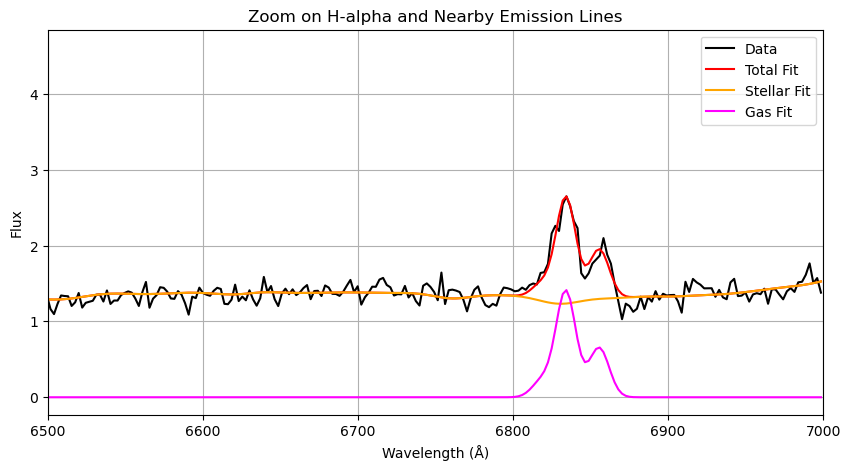

σ (km/s): 255.18

Window centre: 182


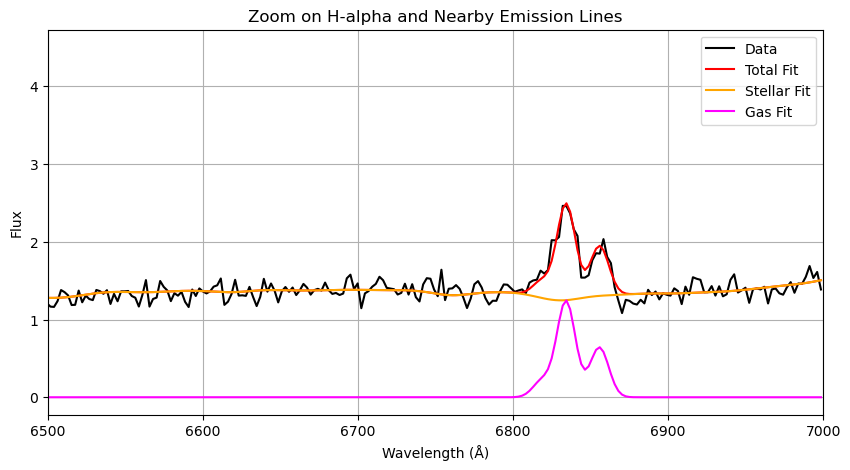

σ (km/s): 234.53

Window centre: 183


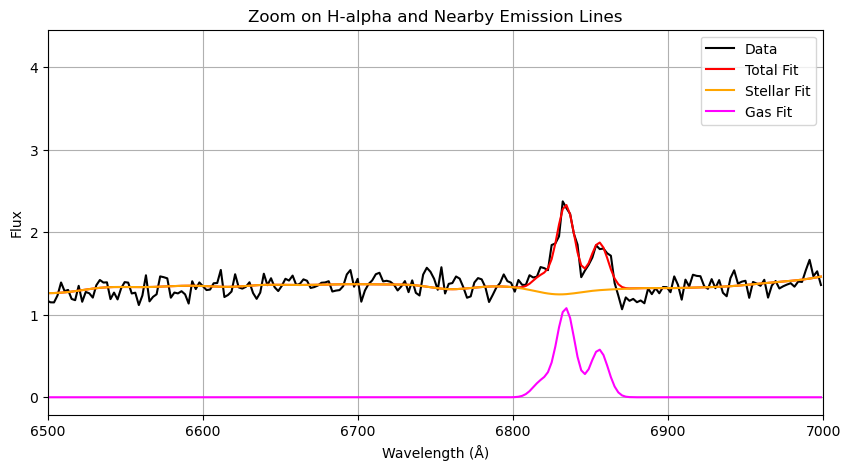

σ (km/s): 224.35

Window centre: 184


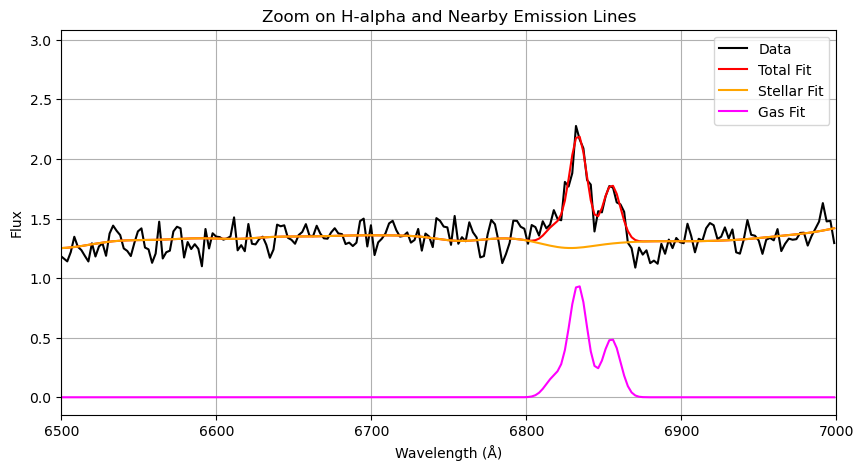

σ (km/s): 223.77

Window centre: 185


σ (km/s): 227.63

Window centre: 186


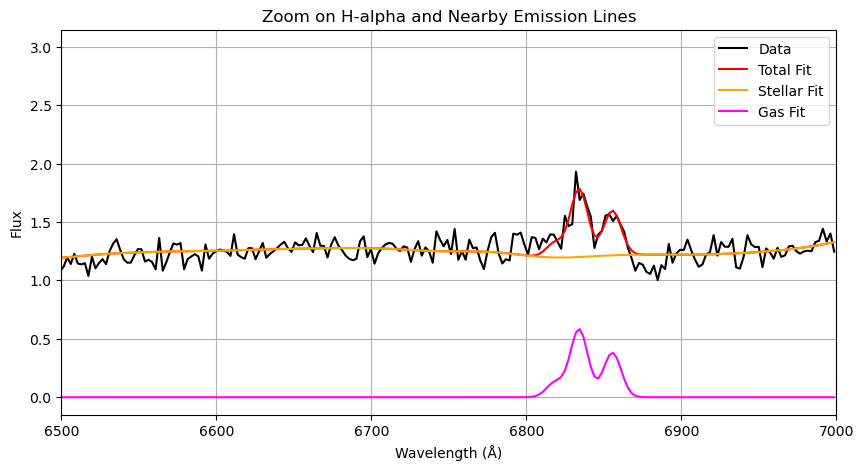

σ (km/s): 218.58

Window centre: 187


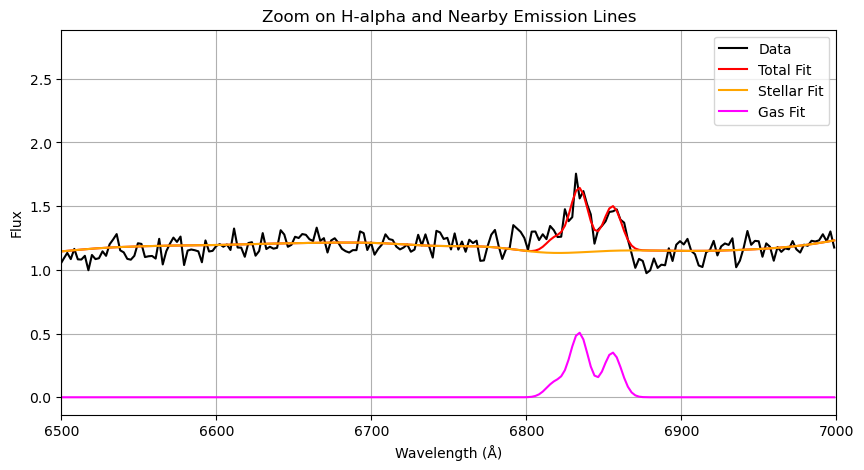

σ (km/s): 226.55

Window centre: 188


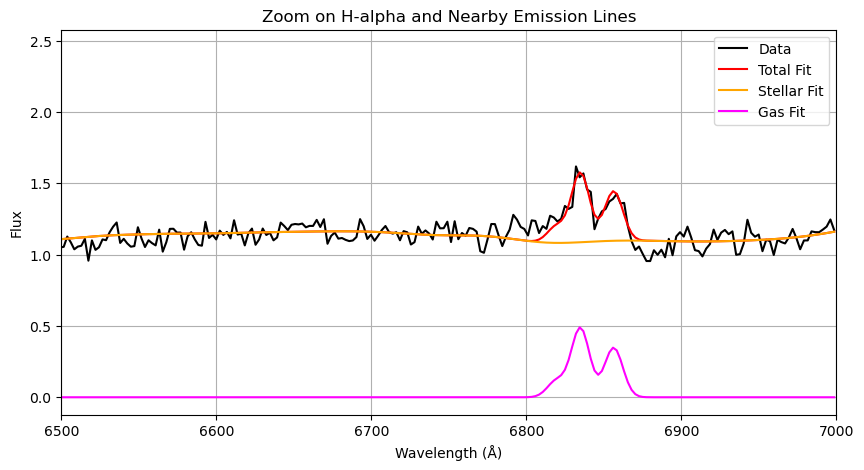

σ (km/s): 229.65

Window centre: 189


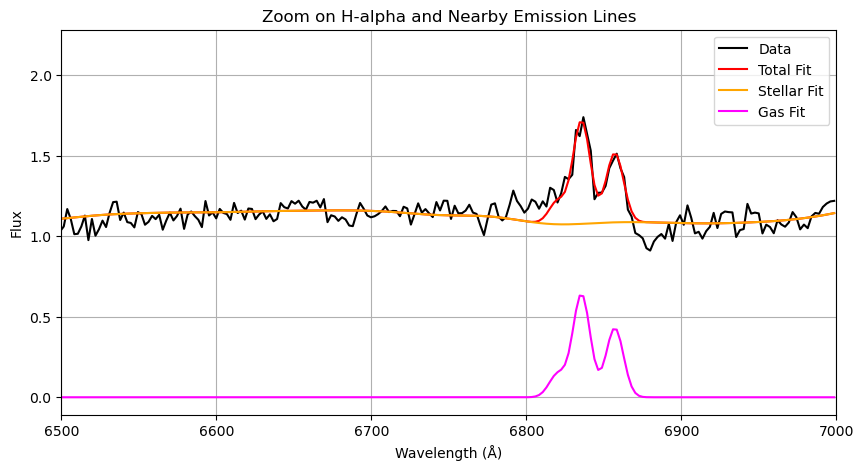

σ (km/s): 213.65

Window centre: 190


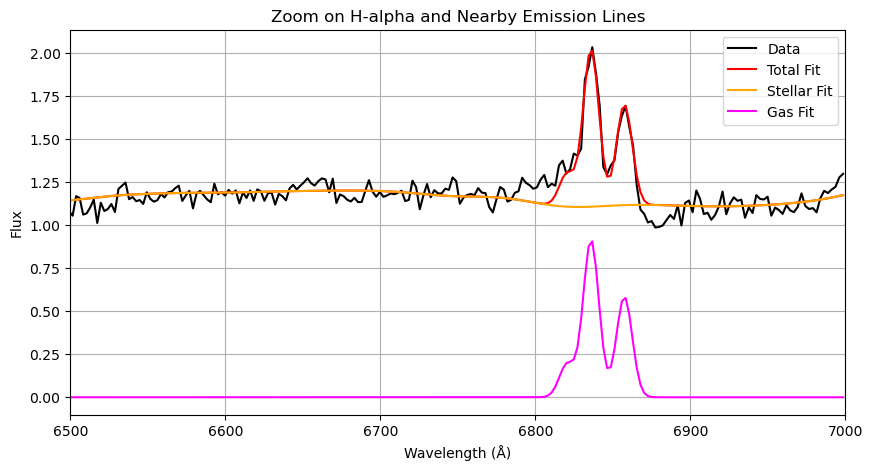

σ (km/s): 187.88

Window centre: 191


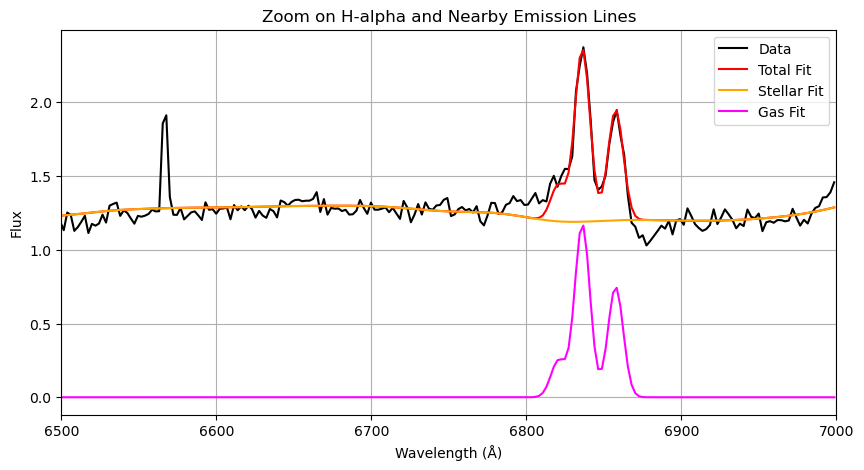

σ (km/s): 178.91

Window centre: 192


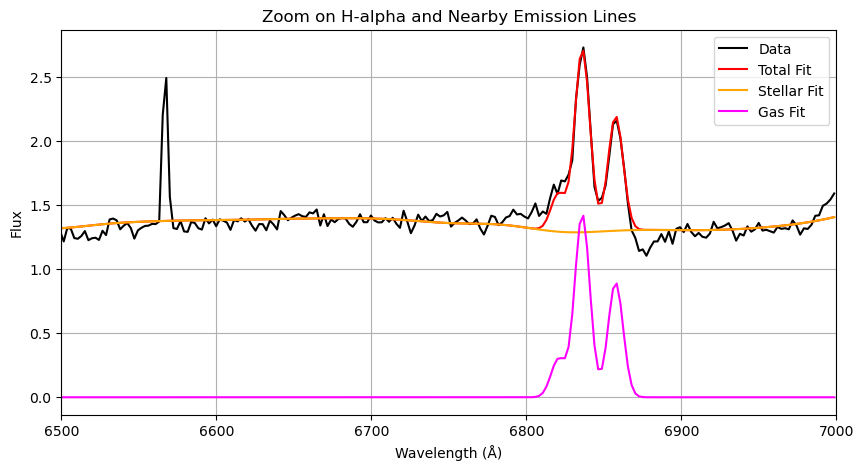

σ (km/s): 176.10

Window centre: 193


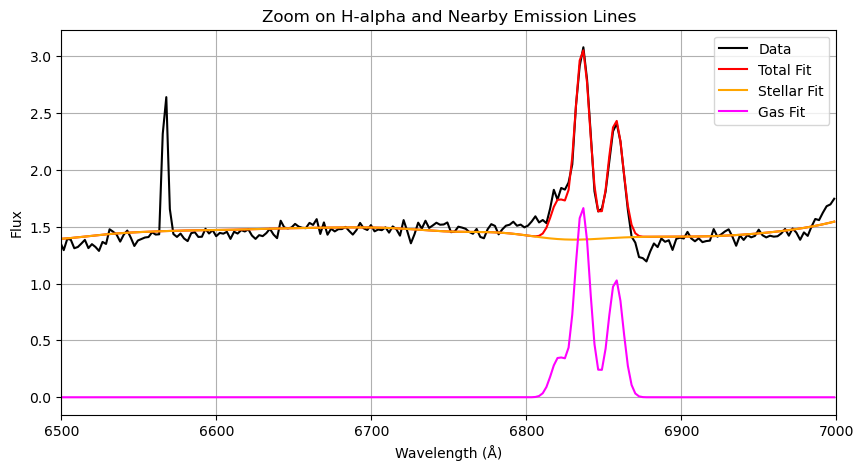

σ (km/s): 172.70

Window centre: 194


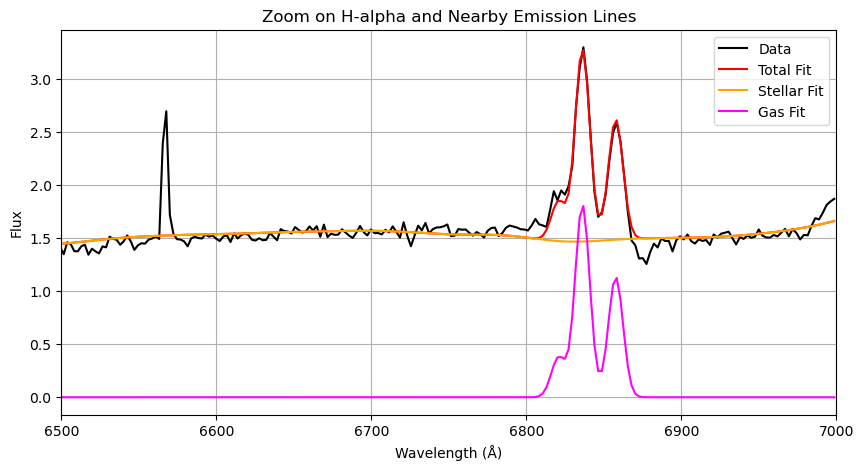

σ (km/s): 168.94

Window centre: 195


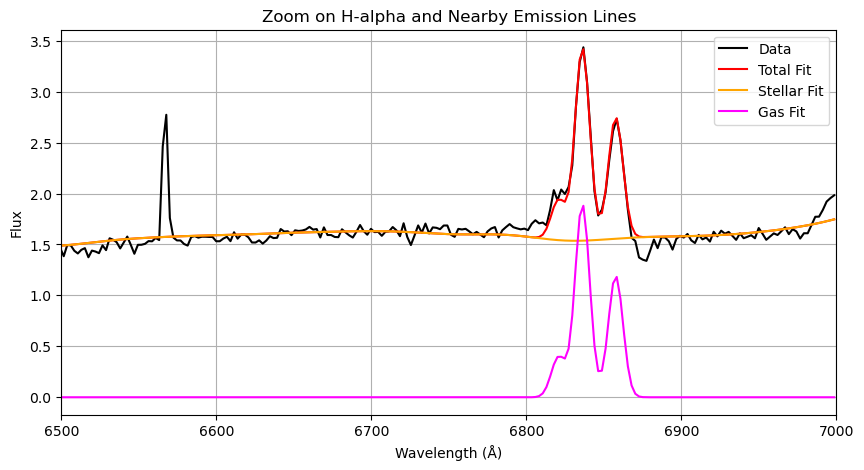

σ (km/s): 169.01

Window centre: 196


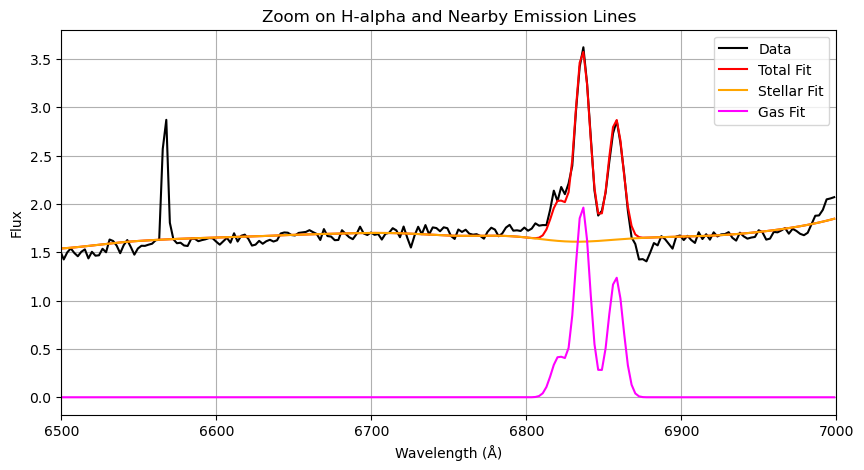

σ (km/s): 171.72

Window centre: 197


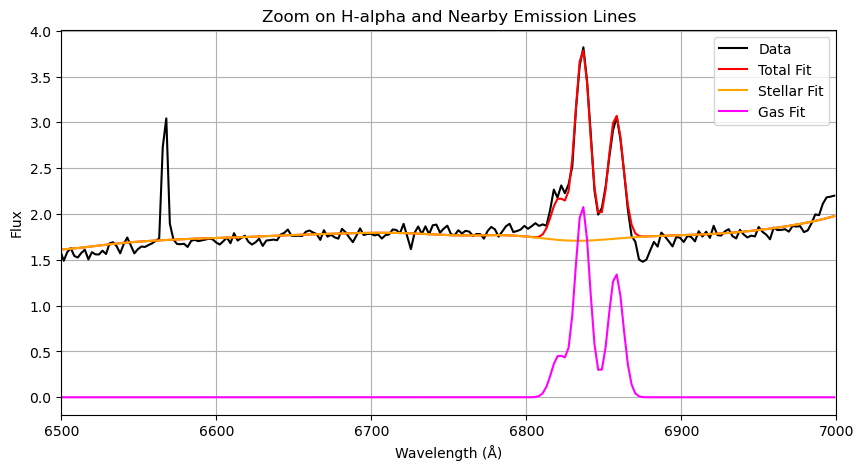

σ (km/s): 171.25

Window centre: 198


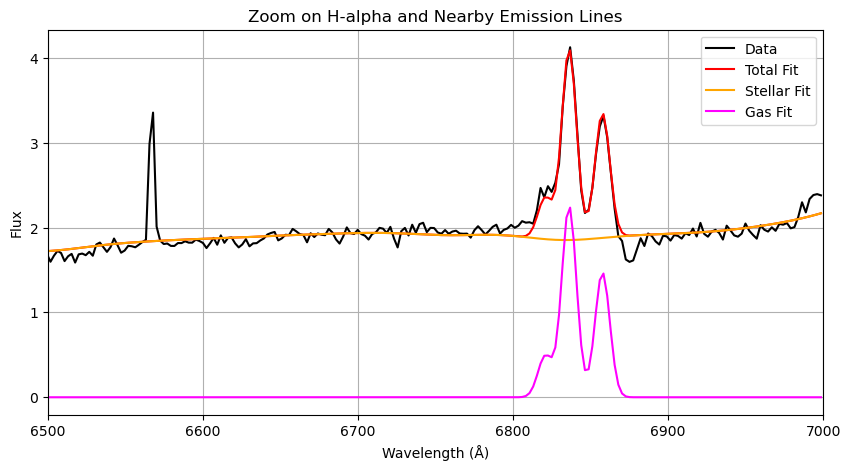

σ (km/s): 170.95

Window centre: 199


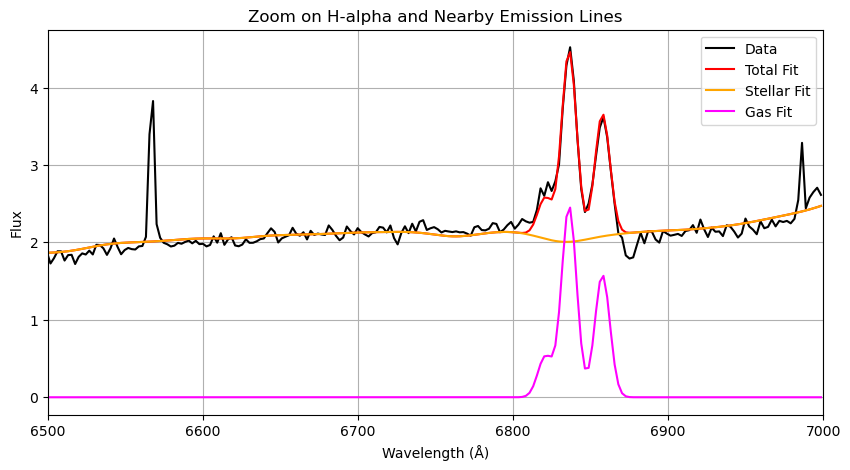

σ (km/s): 174.58

Window centre: 200


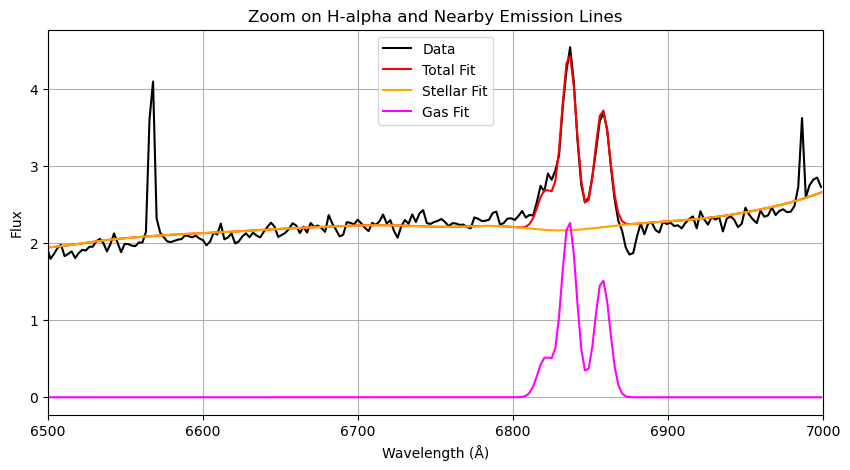

σ (km/s): 175.12

Window centre: 201


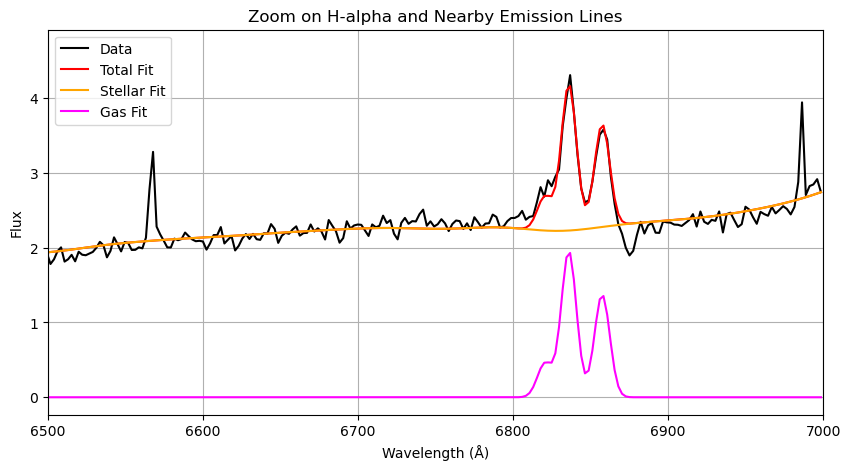

σ (km/s): 179.01

Window centre: 202


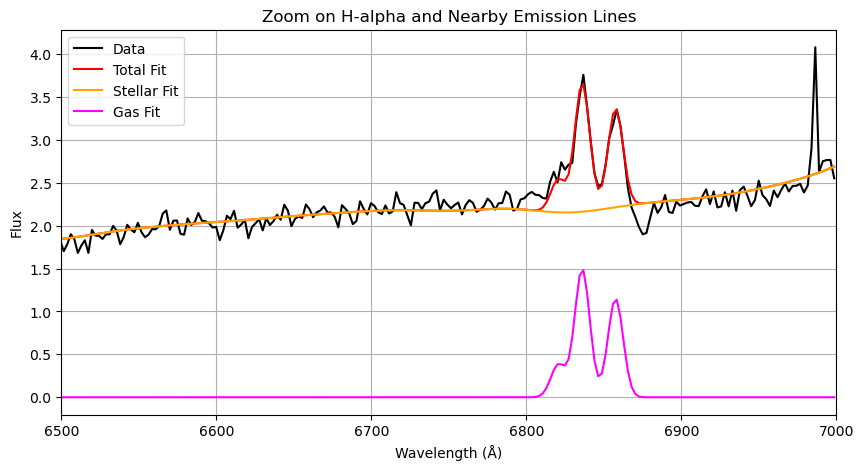

σ (km/s): 176.53

Window centre: 203


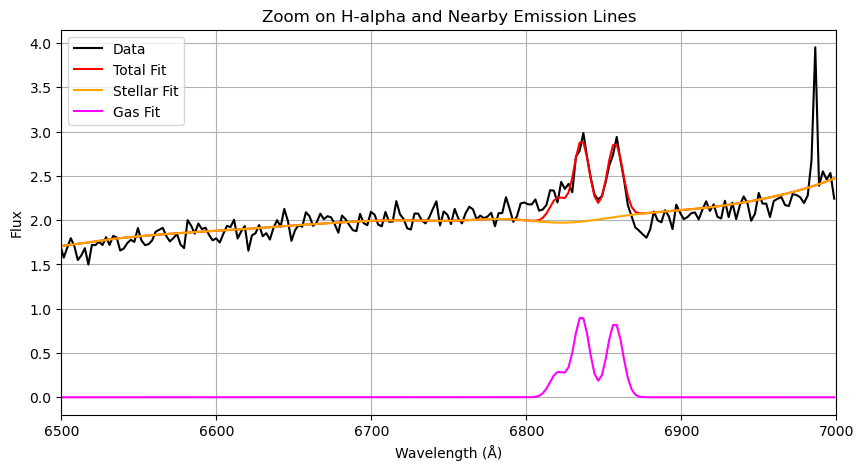

σ (km/s): 187.16

Window centre: 204


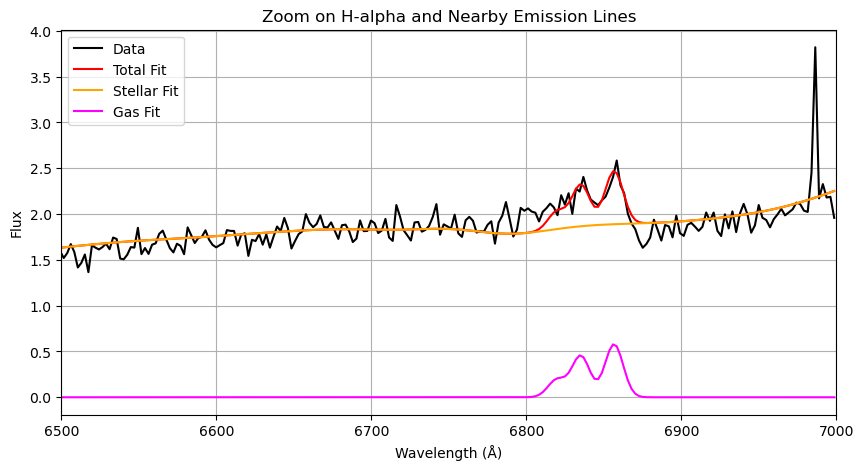

σ (km/s): 226.72

Window centre: 205


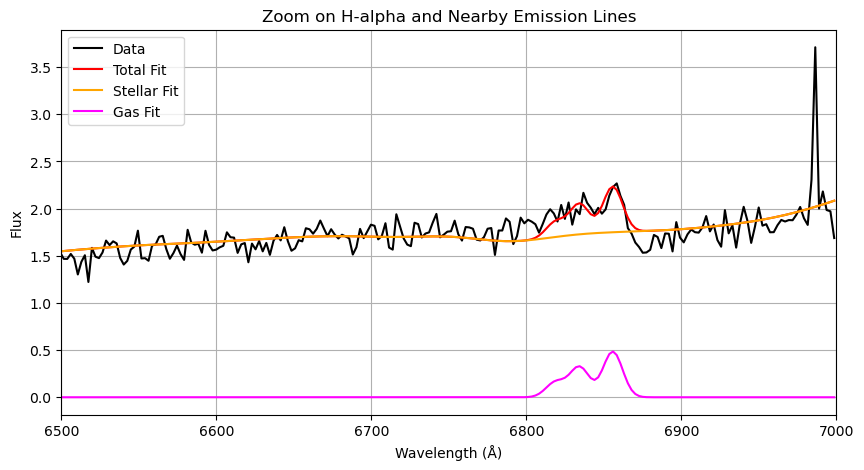

σ (km/s): 249.05

Window centre: 206


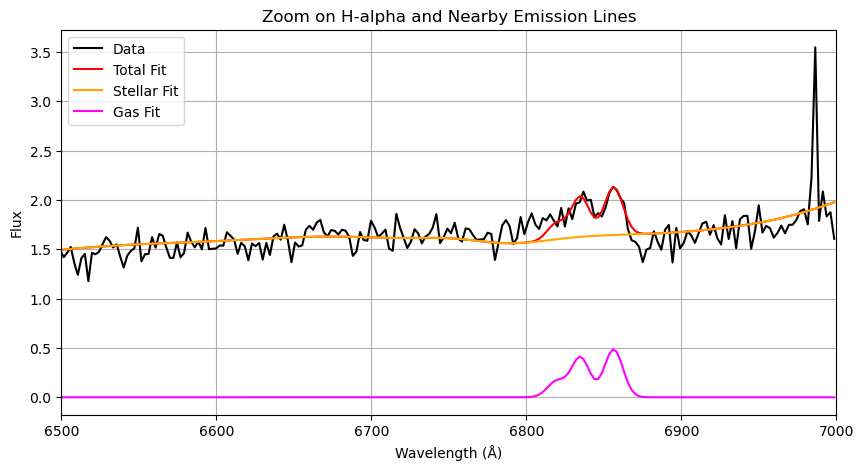

σ (km/s): 232.91

Window centre: 207


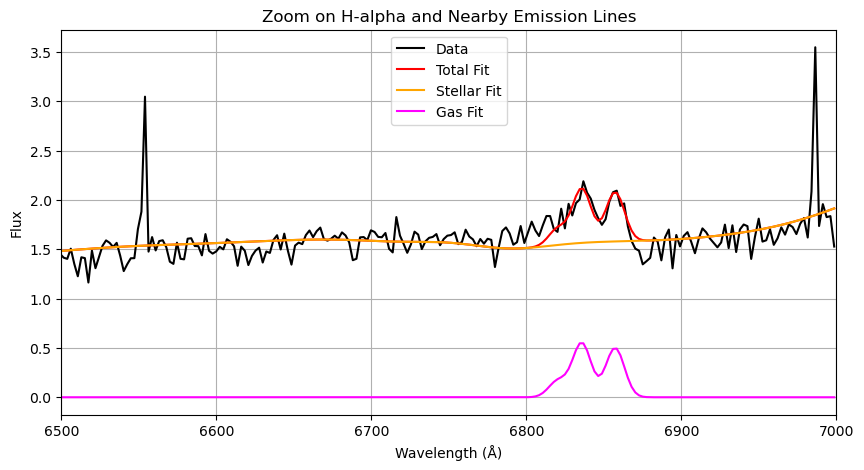

σ (km/s): 235.07

Window centre: 208


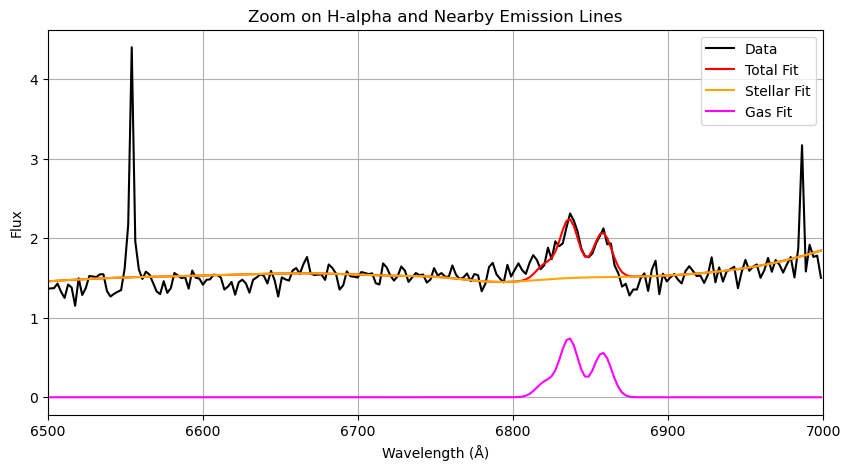

σ (km/s): 230.58

Window centre: 209


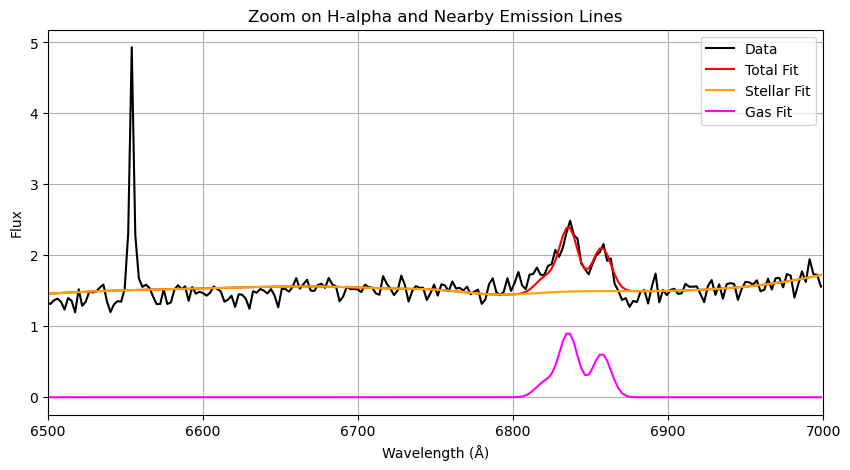

σ (km/s): 236.03

Window centre: 210


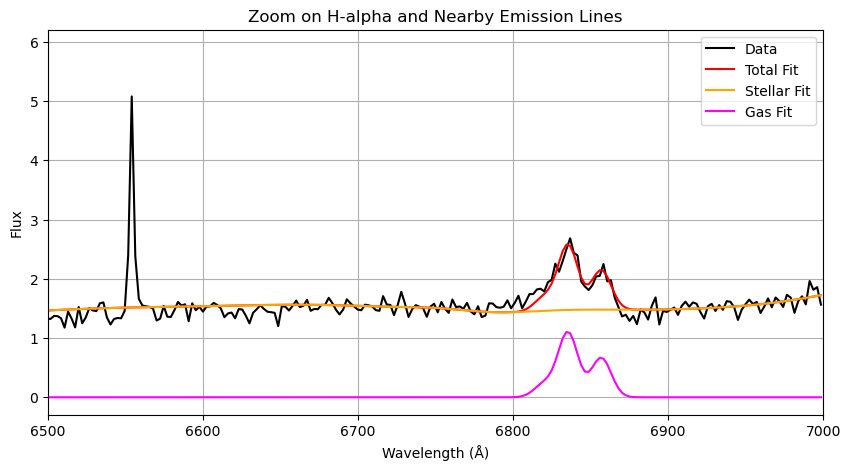

σ (km/s): 255.20

Window centre: 211


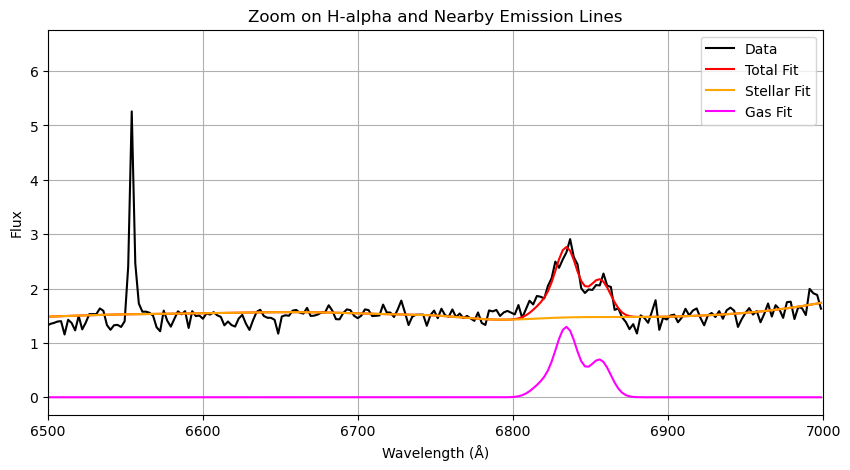

σ (km/s): 282.27

Window centre: 212


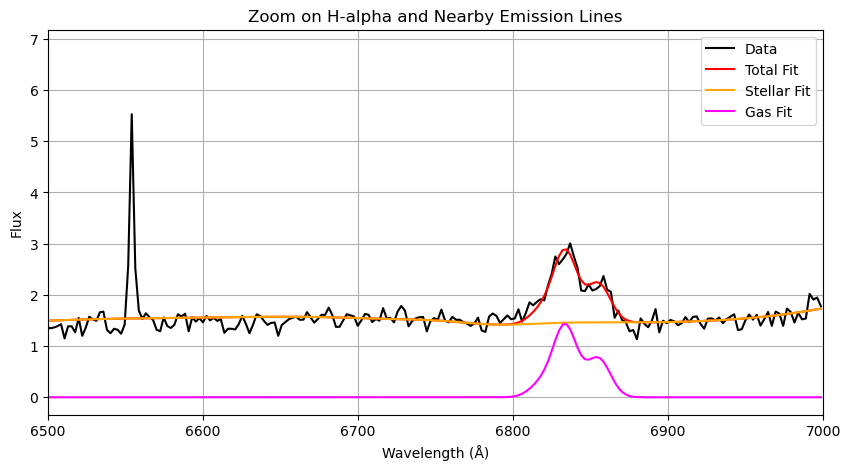

σ (km/s): 313.79

Window centre: 213


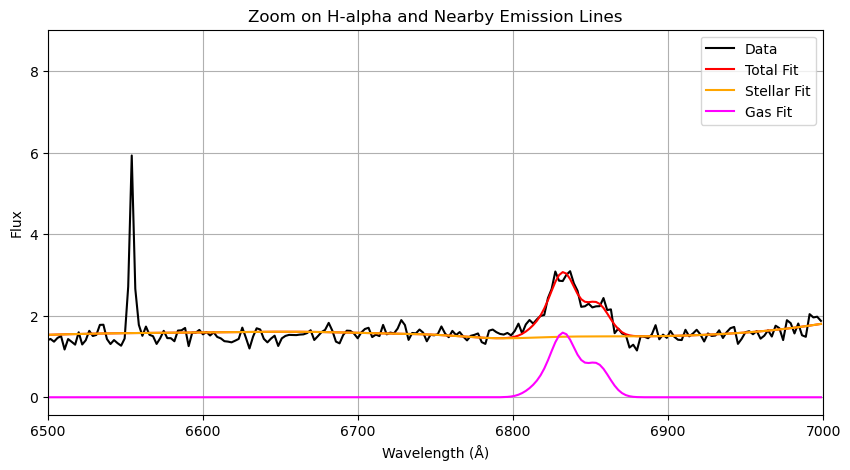

σ (km/s): 330.04

Window centre: 214


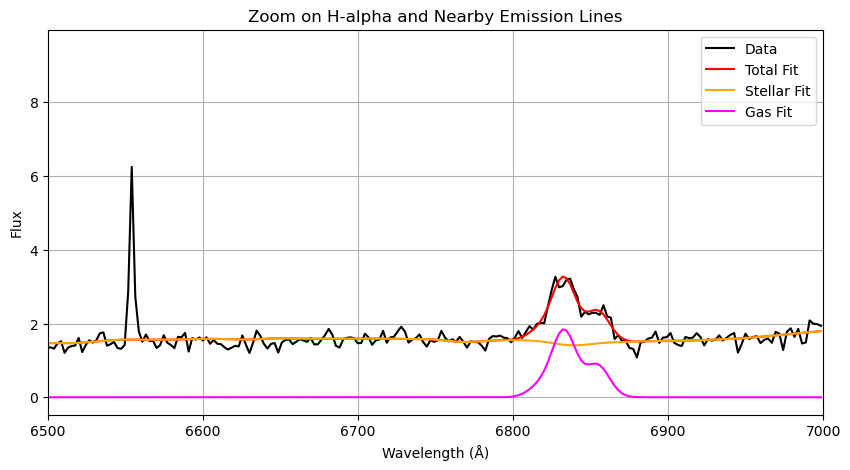

σ (km/s): 318.28

Window centre: 215


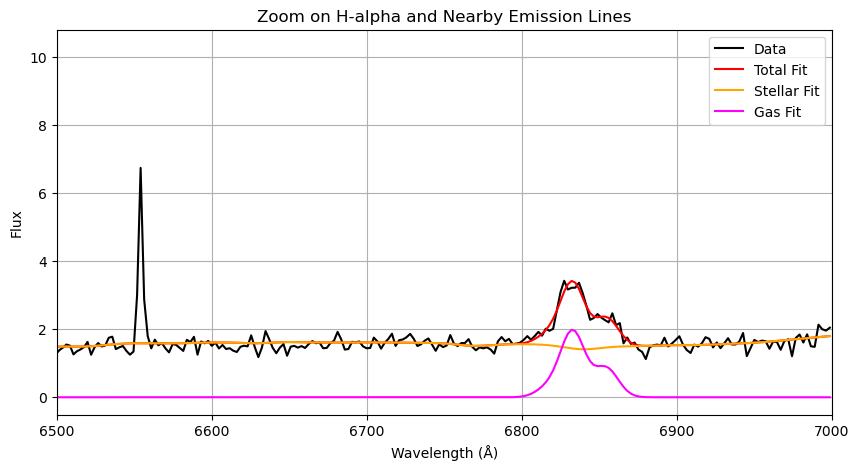

σ (km/s): 322.35

Window centre: 216


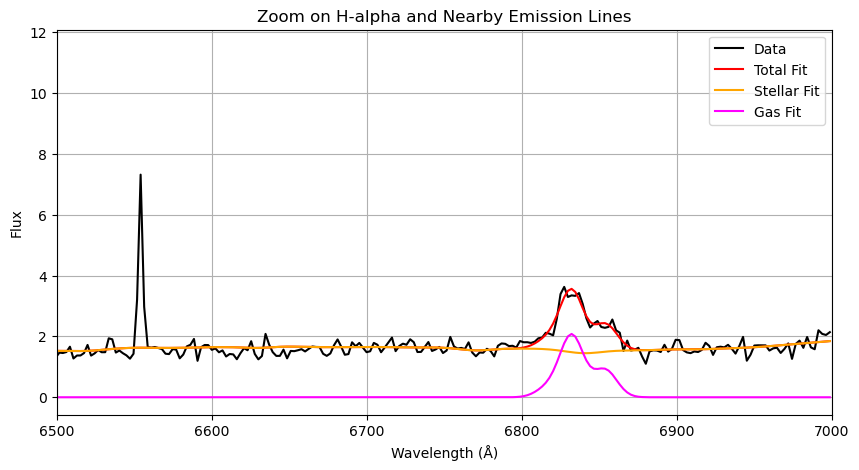

σ (km/s): 313.78

Window centre: 217


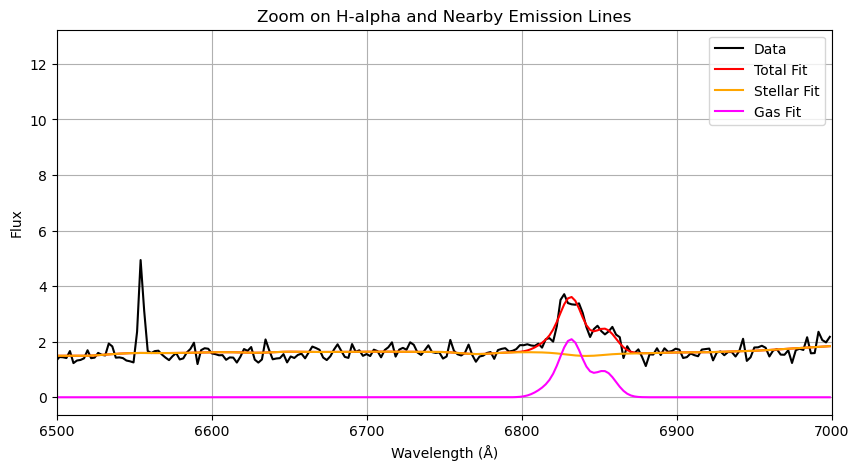

σ (km/s): 299.45

Window centre: 218


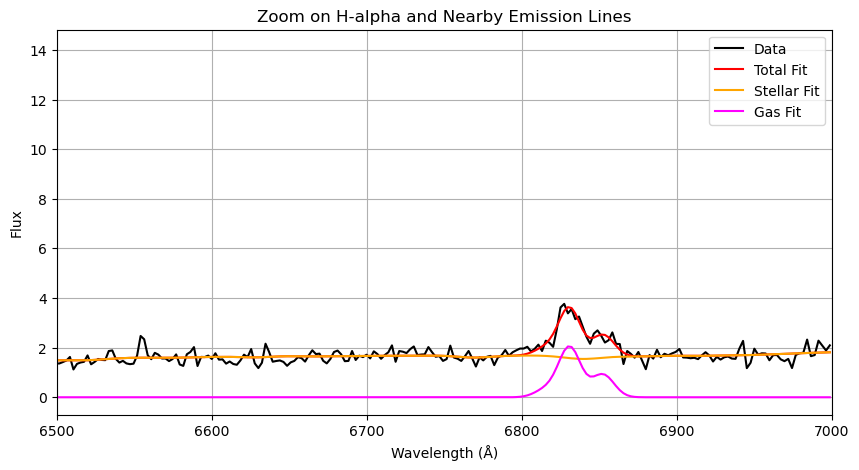

σ (km/s): 289.01

Window centre: 219


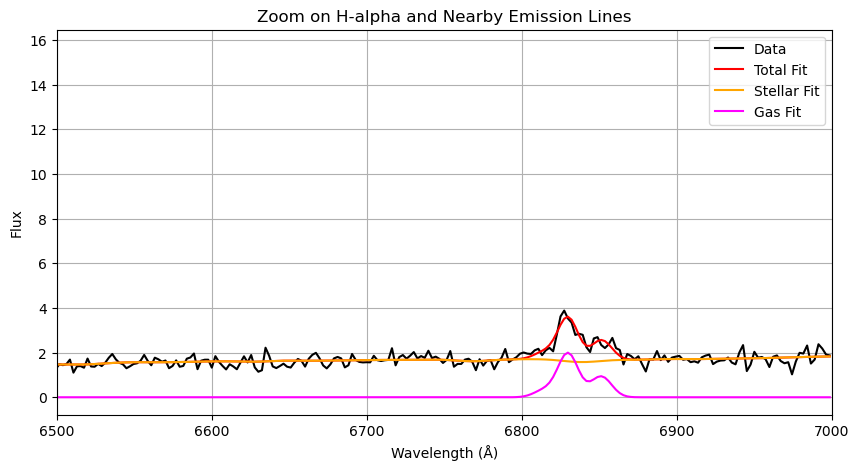

σ (km/s): 265.18

Window centre: 220


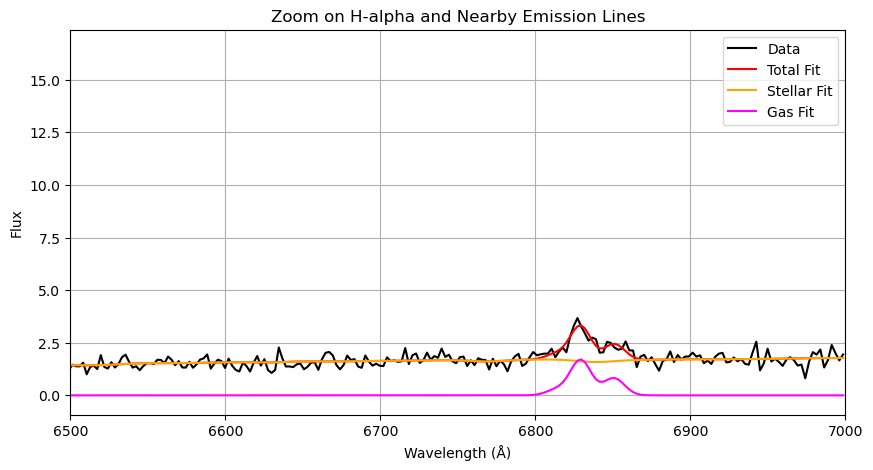

σ (km/s): 270.15

Window centre: 221


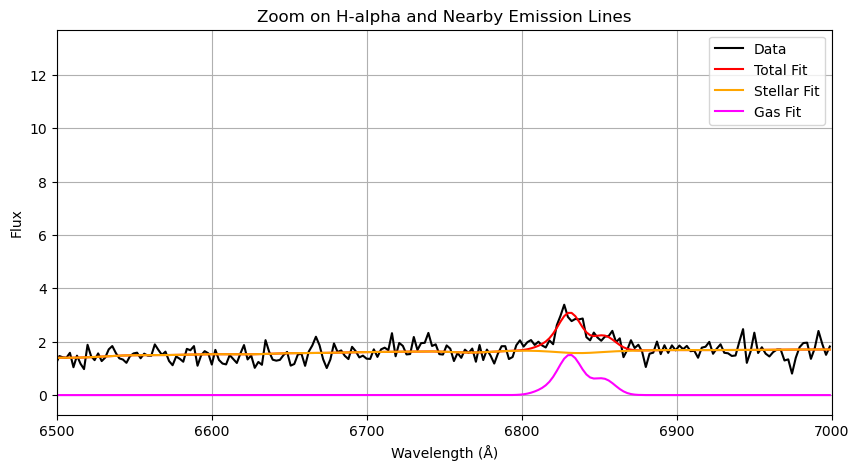

σ (km/s): 309.05

Window centre: 222


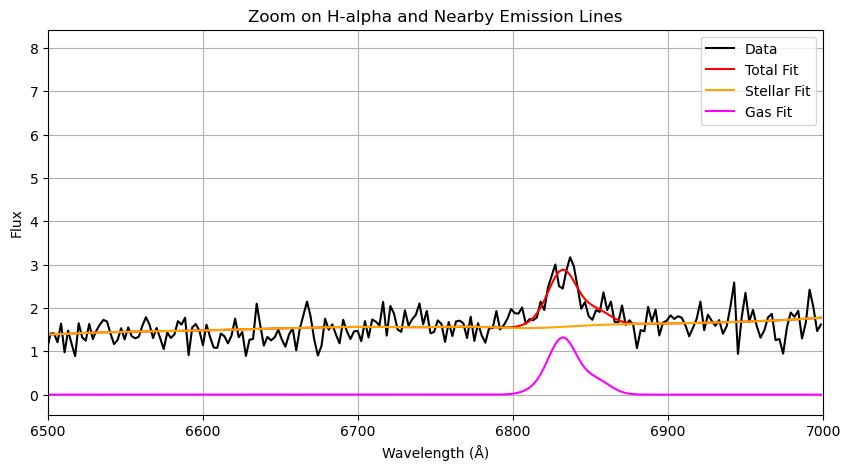

σ (km/s): 379.03

Window centre: 223


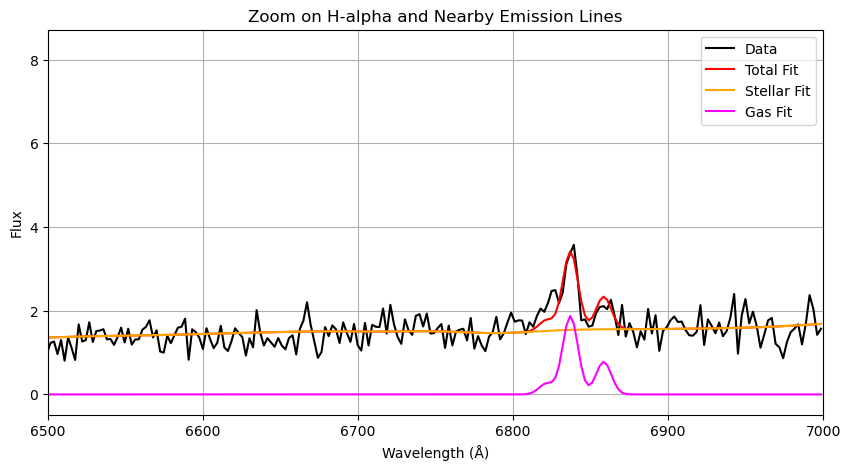

σ (km/s): 178.42

Window centre: 224


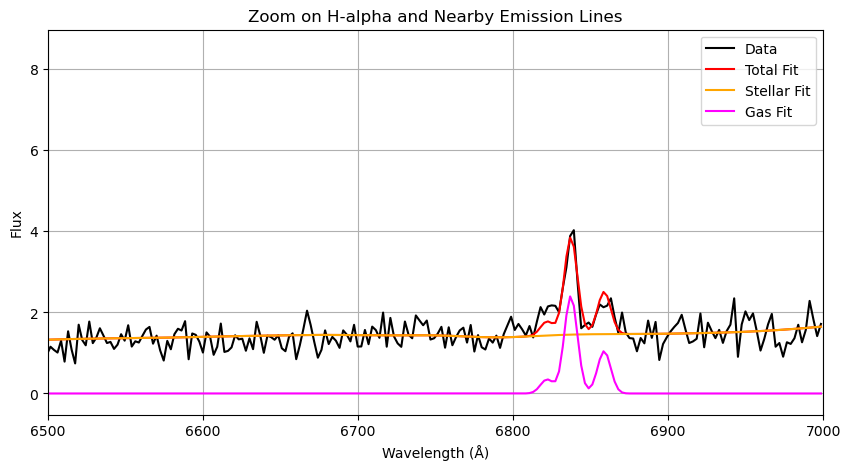

σ (km/s): 141.59

Window centre: 225


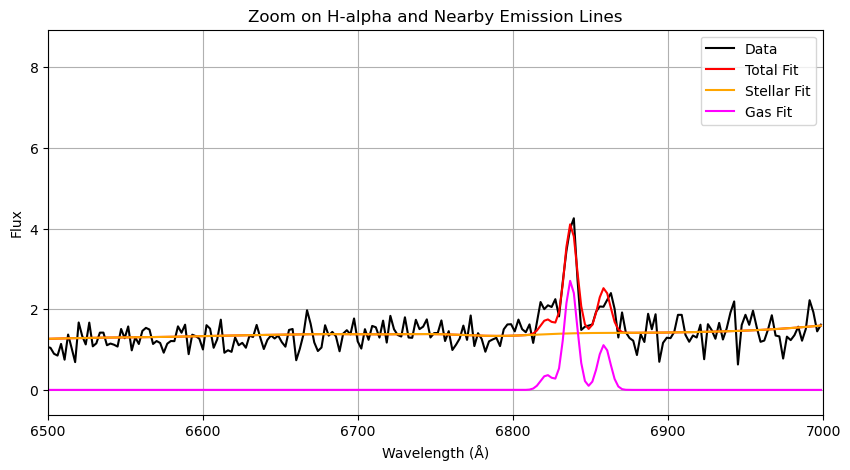

σ (km/s): 130.18

Window centre: 226


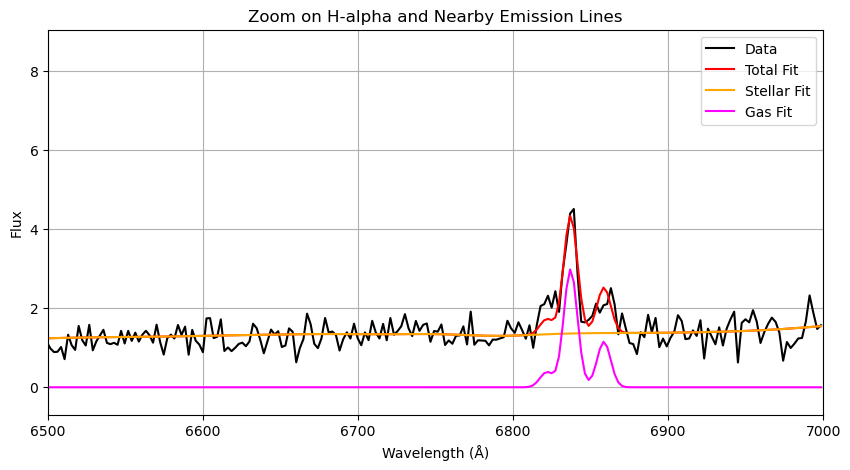

σ (km/s): 150.49

Window centre: 227


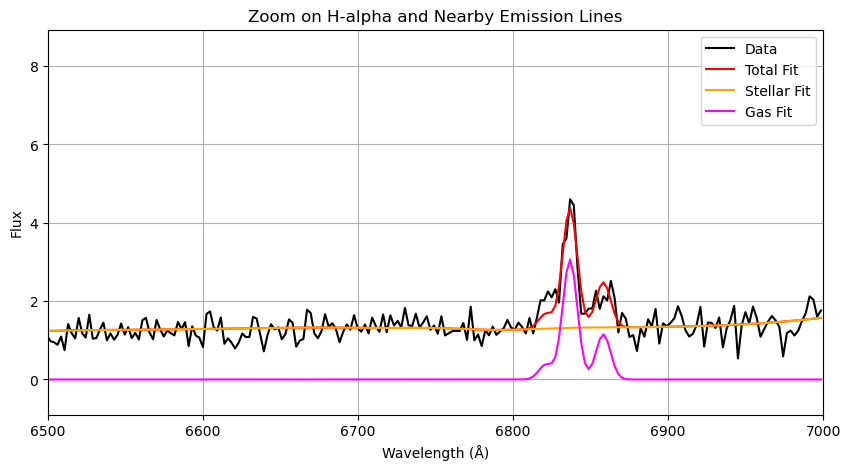

σ (km/s): 166.70

Window centre: 228


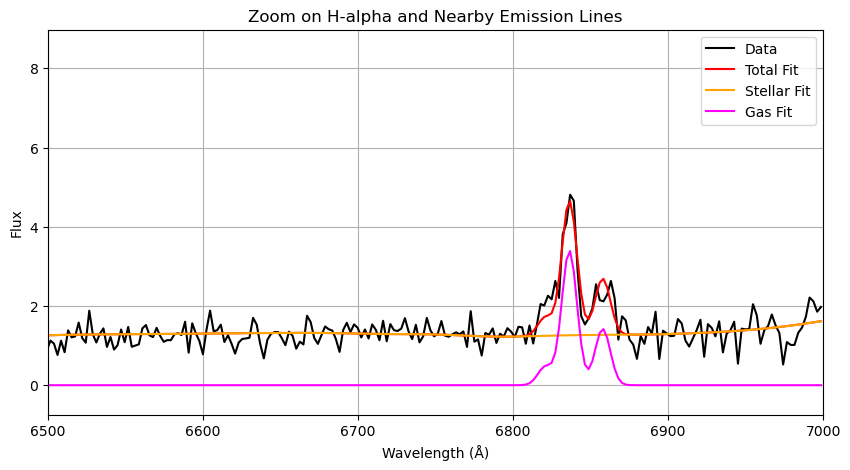

σ (km/s): 178.93

Window centre: 229


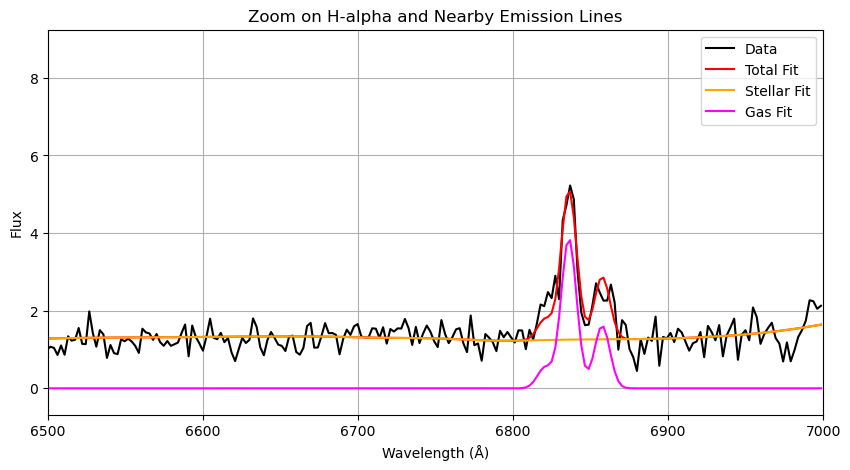

σ (km/s): 182.62

Window centre: 230


σ (km/s): 205.98

Window centre: 231


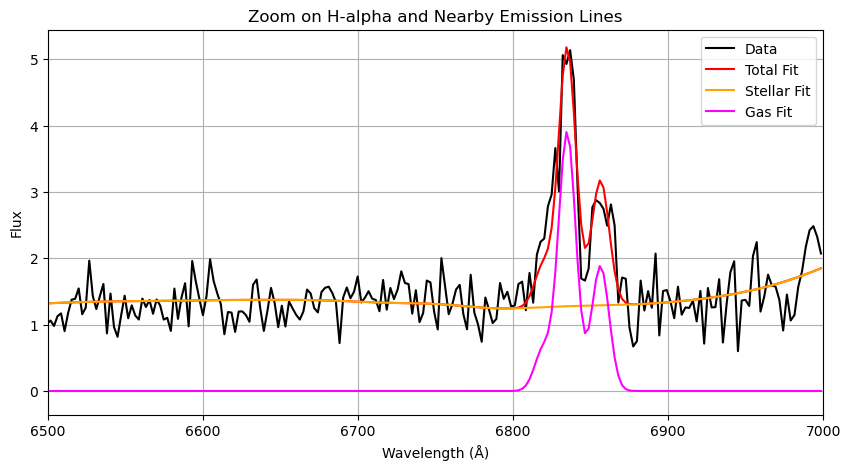

σ (km/s): 214.82

Window centre: 232


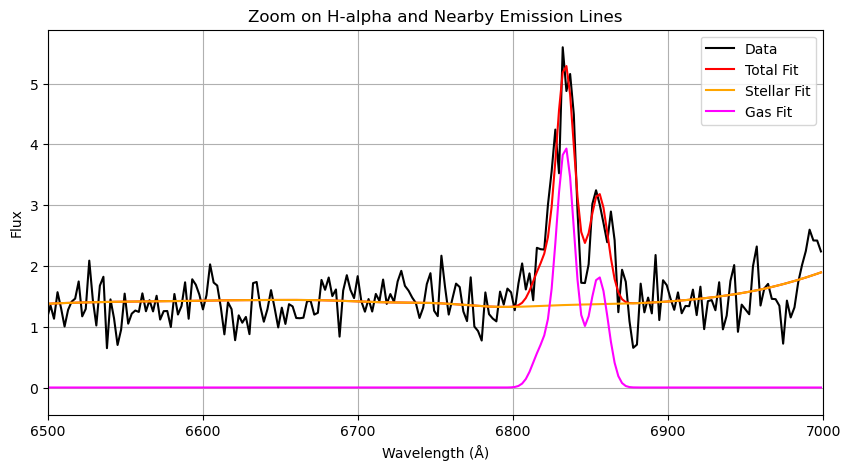

σ (km/s): 230.81

Window centre: 233


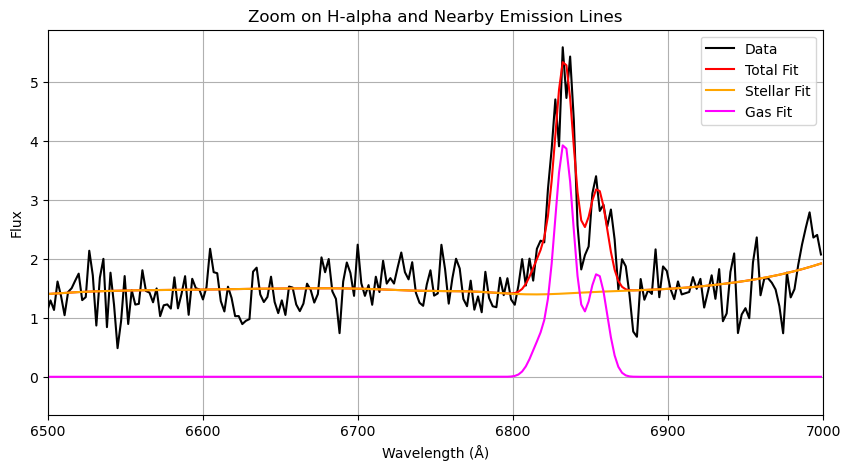

σ (km/s): 241.88

Window centre: 234


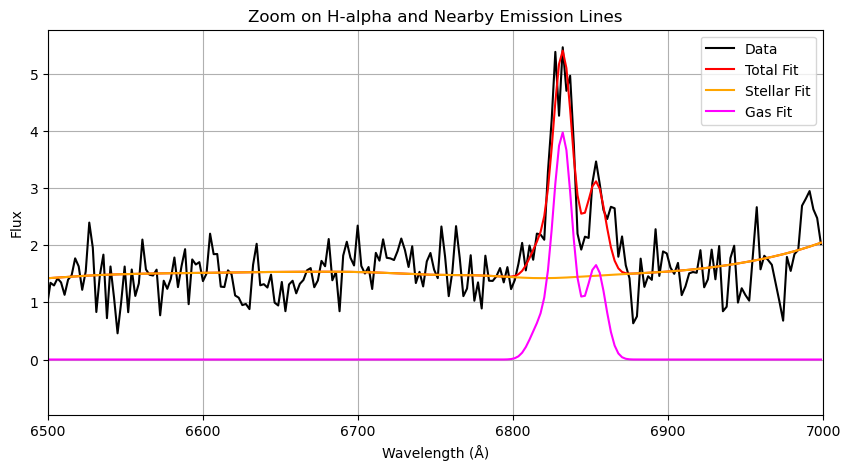

σ (km/s): 242.35

Window centre: 235


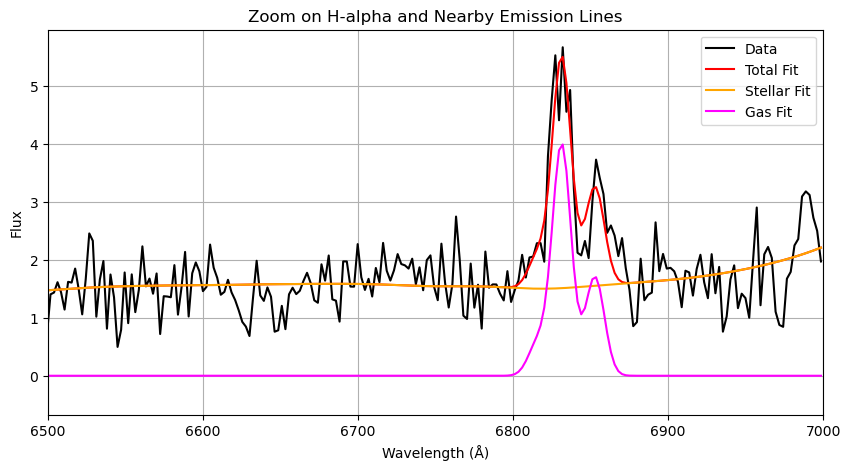

σ (km/s): 238.17

Window centre: 236


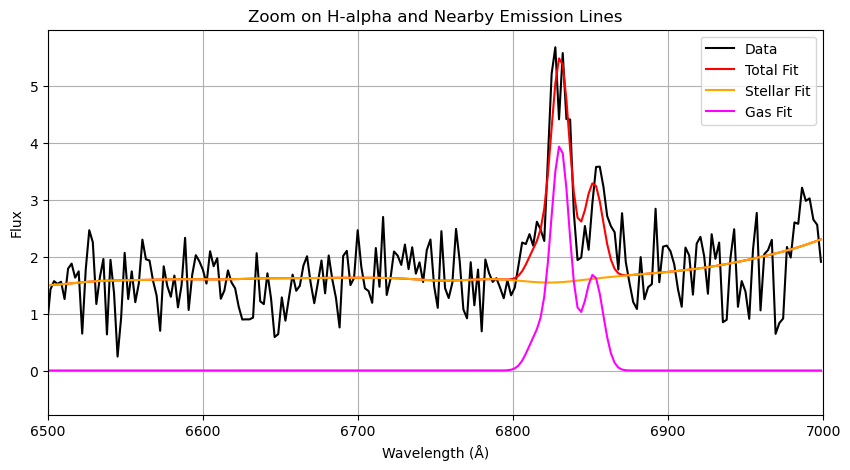

σ (km/s): 235.77

Window centre: 237


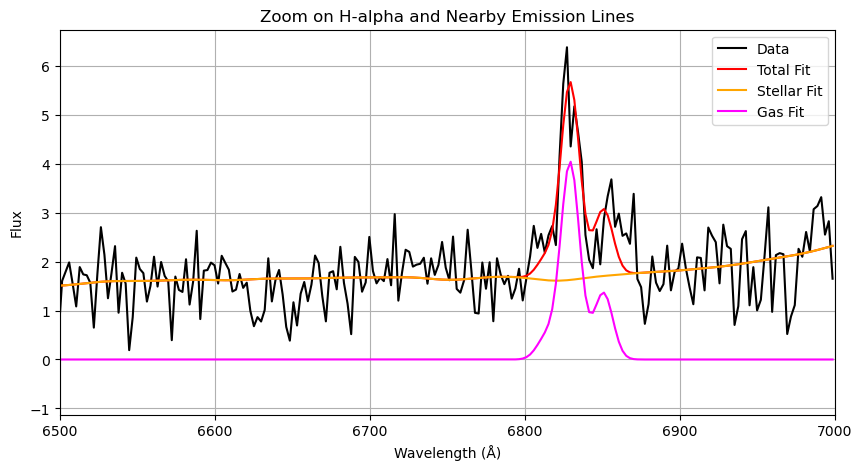

σ (km/s): 238.48

Window centre: 238


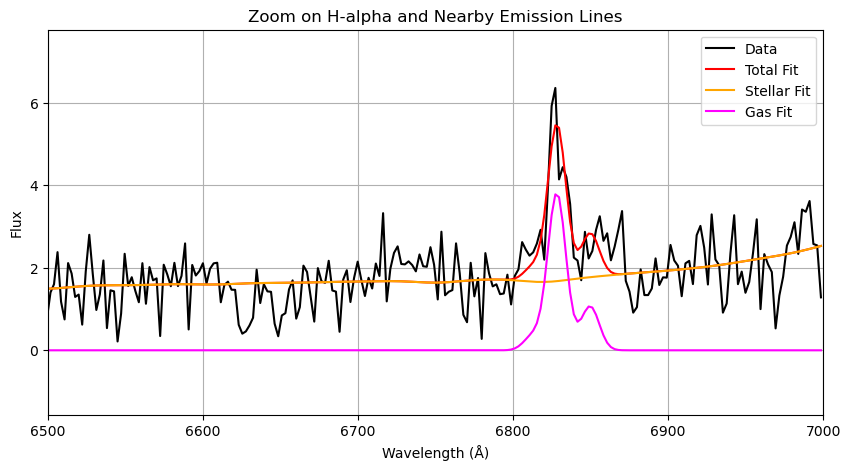

σ (km/s): 226.76

Window centre: 239


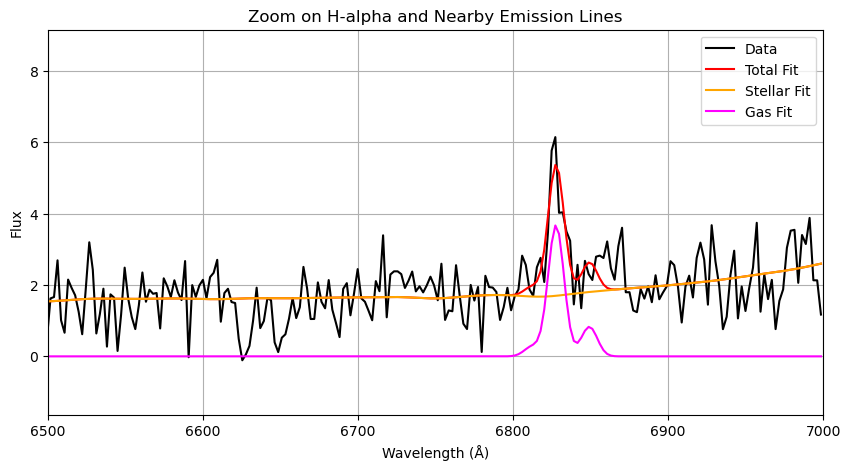

σ (km/s): 190.72

Window centre: 240


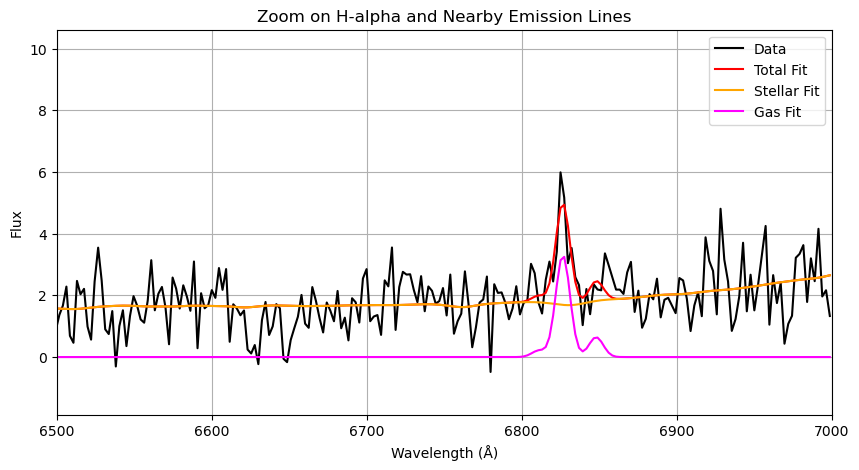

σ (km/s): 163.24

Window centre: 241


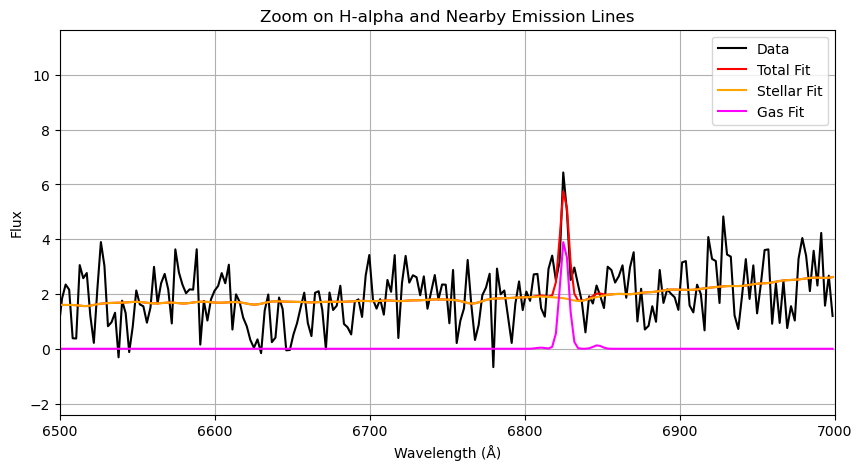

σ (km/s): 1.05

Window centre: 242


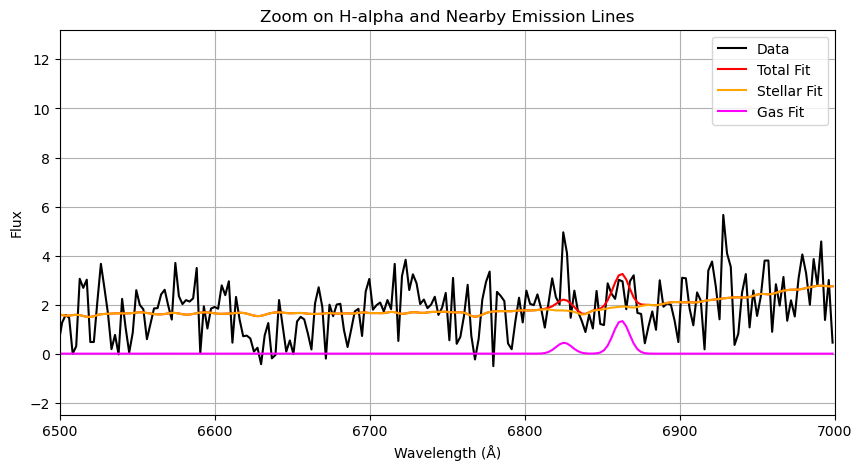

σ (km/s): 193.75

Window centre: 243


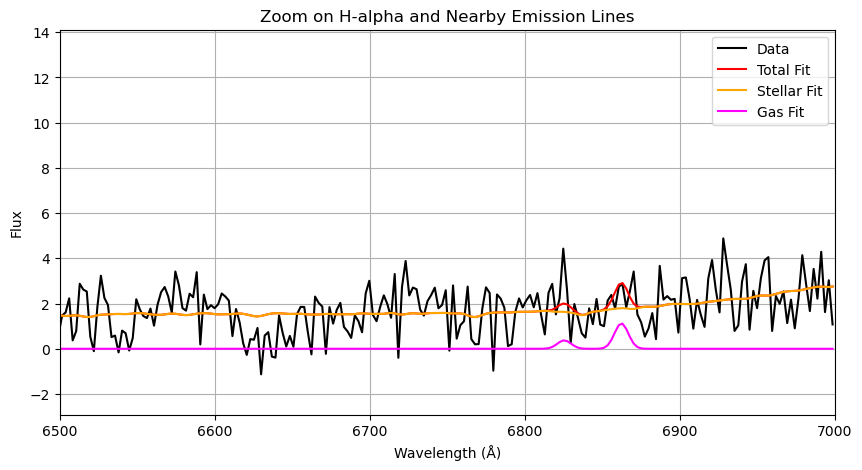

σ (km/s): 151.91

Window centre: 244


σ (km/s): 1.05

Window centre: 245


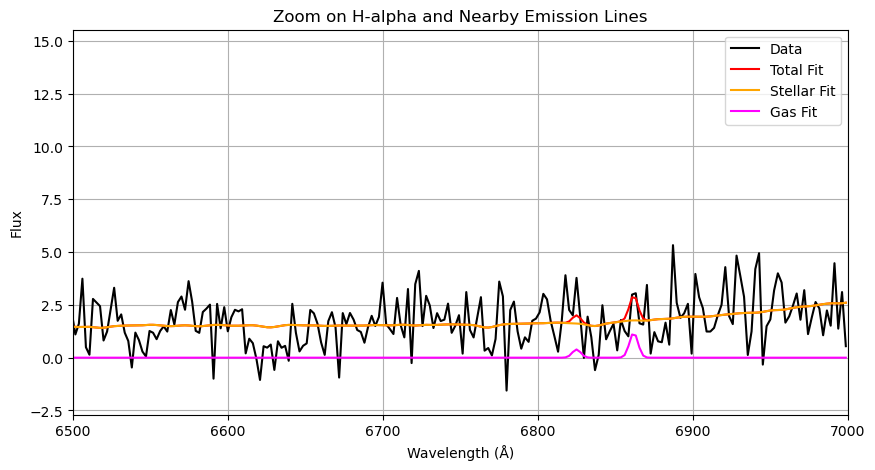

σ (km/s): 1.05



In [4]:
for center, df_rb, pp in results[25:100]:
    # Ensure the function can access 'lam'
    lam_array = df_rb['lam'].values
    plot_ppxf.__globals__['lam'] = lam_array

    print(f"Window centre: {center}")
    plot_ppxf(df_rb, pp)


    # Extract and print the Hα sigma (km/s)
    sigma = pp.sol[1][1]
    print(f"σ (km/s): {sigma:.2f}\n")

In [5]:
centers     = []
velocities  = []; v_errs     = []
dispersions = []; sigma_errs = []
EWs         = []; EW_errs    = []

for center, _, pp in results:
    # --- extract Hα kinematics from the list ---
    sol_gas    = pp.sol[1]
    err_gas    = pp.error[1]
    v_ha, sigma_ha       = sol_gas
    #sigma = np.sqrt(sigma_inst**2 + sigma_ha**2)

    v_ha_err, sigma_ha_err = err_gas

    # find Hα in gas_names (should be idx 0 here)
    idx = np.where(pp.gas_names == "Halpha")[0][0]

    # compute flux, continuum & EW as before
    flux_ha   = pp.gas_flux[idx]
    continuum = pp.bestfit - pp.gas_bestfit
    peak_i    = np.argmax(pp.gas_bestfit_templates[:, idx])
    cont0     = continuum[peak_i]
    cont_err  = pp.noise[peak_i]
    flux_err  = pp.gas_flux_error[idx]

    EW        = flux_ha / cont0
    EW_err    = abs(EW) * np.sqrt((cont_err/cont0)**2 + (flux_err/flux_ha)**2)

    # store
    centers.append(center)
    velocities.append(v_ha)
    v_errs.append(v_ha_err)
    dispersions.append(sigma_ha)
    sigma_errs.append(sigma_ha_err)
    EWs.append(EW)
    EW_errs.append(EW_err)


/var/folders/r3/l94405xd0mq2s62v2swzjq2m0000gn/T/ipykernel_13291/3518839896.py:27: RuntimeWarning: divide by zero encountered in scalar divide
  EW_err    = abs(EW) * np.sqrt((cont_err/cont0)**2 + (flux_err/flux_ha)**2)
/var/folders/r3/l94405xd0mq2s62v2swzjq2m0000gn/T/ipykernel_13291/3518839896.py:27: RuntimeWarning: invalid value encountered in scalar multiply
  EW_err    = abs(EW) * np.sqrt((cont_err/cont0)**2 + (flux_err/flux_ha)**2)


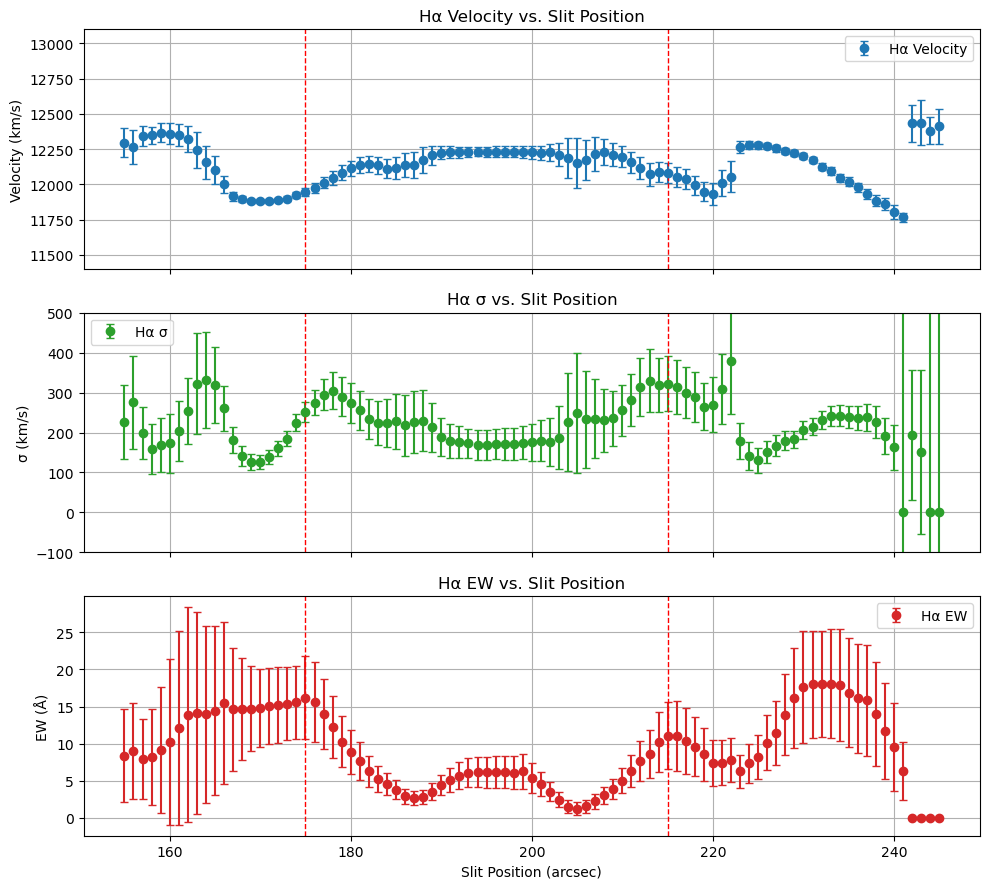

In [6]:
fig, axs = plt.subplots(3,1,figsize=(10,9),sharex=True)

colors = ['#1f77b4', '#2ca02c', '#d62728']  # blue, green, red


# Velocity
axs[0].errorbar(centers, velocities, yerr=v_errs,
                fmt='o', ecolor=colors[0], color=colors[0],
                capsize=3, label='Hα Velocity')
axs[0].set_ylim(11400,13100)
axs[0].set_ylabel("Velocity (km/s)")
axs[0].set_title("Hα Velocity vs. Slit Position")
axs[0].axvline(175, color='red', ls='--', lw=1)
axs[0].axvline(215, color='red', ls='--', lw=1)
axs[0].legend(); axs[0].grid(True)

# Dispersion
axs[1].errorbar(centers, dispersions, yerr=sigma_errs,
                fmt='o', ecolor=colors[1], color=colors[1],
                capsize=3, label='Hα σ')
axs[1].set_ylim(-100,500)
axs[1].set_ylabel("σ (km/s)")
axs[1].set_title("Hα σ vs. Slit Position")
axs[1].axvline(175, color='red', ls='--', lw=1)
axs[1].axvline(215, color='red', ls='--', lw=1)
axs[1].legend(); axs[1].grid(True)

# Equivalent Width
axs[2].errorbar(centers, EWs, yerr = EW_errs,
                fmt='o', ecolor=colors[2], color=colors[2],
                capsize=3, label='Hα EW')
axs[2].set_ylabel("EW (Å)")
axs[2].set_xlabel("Slit Position (arcsec)")
axs[2].set_title("Hα EW vs. Slit Position")
axs[2].axvline(175, color='red', ls='--', lw=1)
axs[2].axvline(215, color='red', ls='--', lw=1)
axs[2].legend(); axs[2].grid(True)

plt.tight_layout()
plt.show()


In [7]:
df = pd.DataFrame({
    'center':        centers,
    'velocity':      velocities,
    'velocity_err':  v_errs,
    'dispersion':    dispersions,
    'dispersion_err': sigma_errs,
    'EW':            EWs,
    'EW_err':        EW_errs
})

# Save to CSV
df.to_csv('../halpha results/SB3_halpha_results_Z.csv', index=False)
